In [5]:
from atmPy.aerosols.instruments.POPS import calibration
from atmPy.tools import plt_tools
import numpy as np

In [9]:
plt.rcParams['figure.dpi'] = 100

# (baustelle) Generate a theoretical calibration

In [23]:
from atmPy.aerosols.instruments.POPS import mie as pm

In [378]:
single_pnt_cali_d = 500
single_pnt_cali_d *= 1e-3
d,mie = pm.makeMie_diameter(diameterRangeInMikroMeter=[single_pnt_cali_d,single_pnt_cali_d + 1e-3],noOfdiameters=2)

In [379]:
d,mie

(array([0.5  , 0.501]), array([31532.60074709, 31646.99400369]))

In [401]:
%matplotlib inline

In [475]:
reload(calibration)

<module 'atmPy.aerosols.instruments.POPS.calibration' from '/mnt/telg/prog/atm-py/atmPy/aerosols/instruments/POPS/calibration.py'>

nope


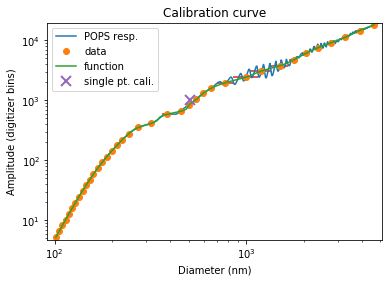

In [477]:
cal,a  = calibration.generate_calibration(
    single_pnt_cali_d=508,
    single_pnt_cali_ior=1.6,
    single_pnt_cali_int=1000,
    ior=complex(1.5,0.01),
    dr=[100, 5000],
    no_pts=500,
    no_cal_pts=40,
    plot=True,
    raise_error=True,
    test=False,
)

In [438]:
single_pnt_cali_d = 500

In [435]:
mie_cal = cal.data

In [452]:
dt = mie_cal.index[abs(mie_cal.index - single_pnt_cali_d).argmin()]
dt

at =mie_cal.loc[dt,'amp']


In [456]:
diter = cal.calibrationFunction(at)
step = 0.01


array(527.14124738)

In [457]:
from scipy import optimize

In [459]:
amp = optimize.fsolve(lambda x: cal.calibrationFunction(x) - single_pnt_cali_d, at)

In [460]:
cal.calibrationFunction(amp)

array([500.])

In [447]:
mie_cal

,amp,sigma_d
d_nm,,
108.155222,2.562317e+03,38.550978
121.651856,4.538907e+03,42.506011
144.551708,1.162874e+04,53.887170
289.298975,2.148529e+04,88.596071
527.141247,5.005999e+04,95.158230
807.921342,1.000956e+05,126.187587
1243.455659,2.187317e+05,157.018229
1898.833026,4.650760e+05,212.886374
2888.268334,1.038190e+06,302.756171


In [429]:
calold.calibrationFunction(500)

ValueError: A value in x_new is below the interpolation range.

nope


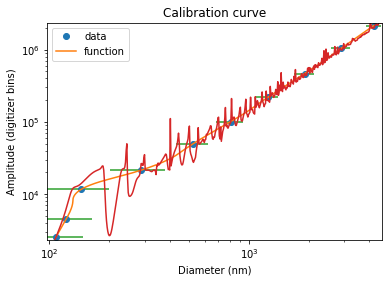

In [421]:
dft  = calibration.generate_calibration(
    single_pnt_cali_d=508,
    single_pnt_cali_ior=1.6,
    single_pnt_cali_int=1000,
    ior=2.95,
    dr=[100, 5000],
    no_pts=500,
    no_cal_pts=40,
    plot=True,
    raise_error=True,
    test=False,
)

In [417]:
dft

,d,amp
0,0.100000,1.512592e+03
1,0.100787,1.593447e+03
2,0.101580,1.678777e+03
3,0.102380,1.768863e+03
4,0.103186,1.864005e+03
...,...,...
495,4.845638,2.572414e+06
496,4.883776,2.913062e+06
497,4.922214,2.757491e+06
498,4.960955,2.752258e+06


In [410]:
dr=[100, 5000]
drum = np.array(dr)/1e3
d, amp = pm.makeMie_diameter(diameterRangeInMikroMeter=drum,
                                 noOfdiameters=500,
                                 IOR=2.95)

[]

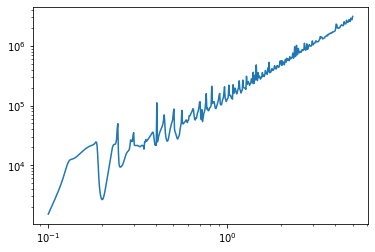

In [412]:
plt.plot(d,amp)
plt.loglog()

In [365]:
cal  = calibration.generate_calibration(
    single_pnt_cali_d=508,
    single_pnt_cali_ior=1.6,
    single_pnt_cali_int=1000,
    ior=1.5,
    dr=[100, 5000],
    no_pts=500,
    no_cal_pts=40,
    plot=False,
    raise_error=True,
    test=False,
)

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.lines.Line2D at 0x7fc98e304160>)

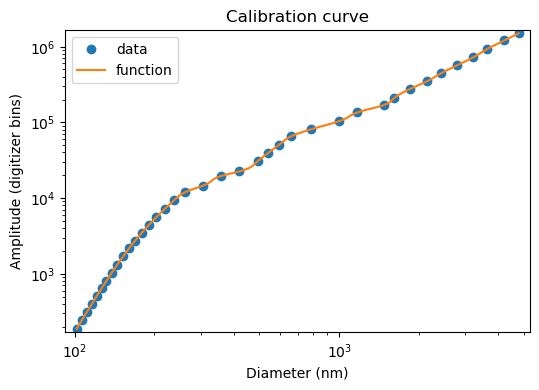

In [369]:
cal.plot()

In [ ]:
np.round()

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.lines.Line2D at 0x7fc98eb40e80>)

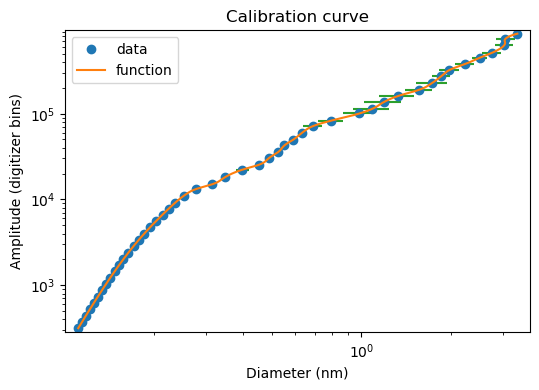

In [315]:
cal.plot()

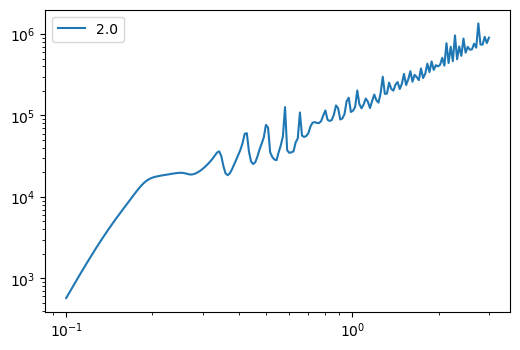

In [61]:
ns = np.linspace(1.5,2.95,3)
ns = [2.]

f,a = plt.subplots()
a.loglog()
for n in ns:
    d,mie = pm.makeMie_diameter(IOR = n)
    g, = a.plot(d,mie, label = n)
#     g.set_linestyle('')
#     g.set_marker('.')
a.legend()

In [224]:
%%time
n = 2.95
d,amp = pm.makeMie_diameter(diameterRangeInMikroMeter=[0.1, 5.0],  
                            noOfdiameters=1e4,
                            IOR = n)

df = pd.DataFrame({'d':d, 'amp':amp})

CPU times: user 25.9 s, sys: 3.34 ms, total: 25.9 s
Wall time: 25.9 s


In [290]:
# %%time
nofbins = 50
valid = False
while not valid:
    nofbins -= 1
    binedgs = np.logspace(np.log10(mie.min()), np.log10(mie.max()), nofbins)
    binedgs[0] -= (binedgs[1] - binedgs[0]) * 0.01 # this is to ensure the first point is not onthe edge ... for cut function used later


    dfavg = df.groupby(pd.cut(df.amp, binedgs)).median()
    dfstd = df.groupby(pd.cut(df.amp, binedgs)).mad()
    
    dfavg.index = dfavg.d
    dfstd.index = dfavg.d
    dfavg['sigma_d'] = dfstd.d
    
    dfavg.index.name = None
    # dfbined

    dfavg.sort_values('amp', axis=0, inplace=True)
    if not ((dfavg.d.values[1:] - dfavg.d.values[:-1]) < 0).sum():
        valid = True
if 0:
    a = df.mie.hist(bins = dfavg)
    a.semilogx()
nofbins

14

[]

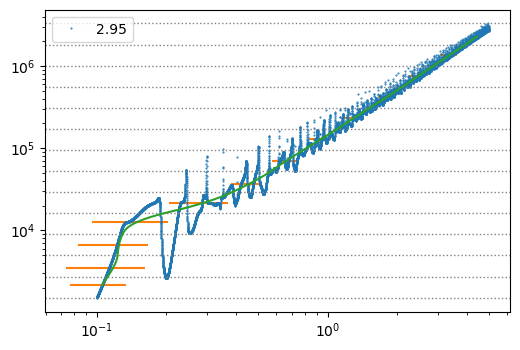

In [292]:
f,a = plt.subplots()
g, = a.plot(d,amp, label = n)
g.set_linestyle('')
g.set_marker('.')
g.set_markersize(1)

#print binedges
if 1:
    for be in binedgs:
        out = a.axhline(be)
        out.set_linestyle(':')
        out.set_linewidth(1)
        out.set_color('0.5')
        
#print averaged data
if 1:
#     a.plot(dfavg.d, dfavg.mie)
#     a.errorbar(dfavg.d, dfavg.amp, xerr=dfstd.d, yerr=dfstd.amp, zorder = 10, ls ='')
    a.errorbar(dfavg.d, dfavg.amp, 
               xerr=dfavg.sigma_d,
#                xerr = dfstd.amp,
#                yerr=dfstd.amp, 
               zorder = 1, ls ='')
    
#test
if 1:
    plt.plot(dnew, ampnew)

#     plt.plot(d,amp)


a.legend()
a.loglog()


In [282]:
dfstd.amp

d
0.105527       353.330391
0.117744       549.275334
0.124641       992.215723
0.149043      1681.107520
0.287811      2574.354107
0.452229      6517.281382
0.660959     11989.748964
0.933521     17506.859147
1.298767     36102.394188
1.802330     61207.665819
2.457967    112514.366540
3.359985    204313.347978
4.432375    277124.476451
Name: amp, dtype: float64

In [284]:
dfavg.sigma_d

0.105527       353.330391
0.117744       549.275334
0.124641       992.215723
0.149043      1681.107520
0.287811      2574.354107
0.452229      6517.281382
0.660959     11989.748964
0.933521     17506.859147
1.298767     36102.394188
1.802330     61207.665819
2.457967    112514.366540
3.359985    204313.347978
4.432375    277124.476451
Name: sigma_d, dtype: float64

In [270]:
reload(calibration)

<module 'atmPy.aerosols.instruments.POPS.calibration' from '/mnt/telg/prog/atm-py/atmPy/aerosols/instruments/POPS/calibration.py'>

In [293]:
# %%debug -b /mnt/telg/programs/anaconda3/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:177
cali = calibration.Calibration(dfavg)

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.lines.Line2D at 0x7fc98fdc9cc0>)

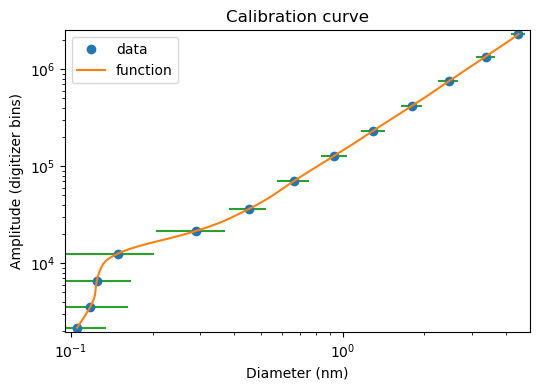

In [294]:
cali.plot_calibration()

In [196]:
bla = type("bla", (), {})
self = bla()
self.data = dfavg

In [215]:
from scipy import interpolate

[]

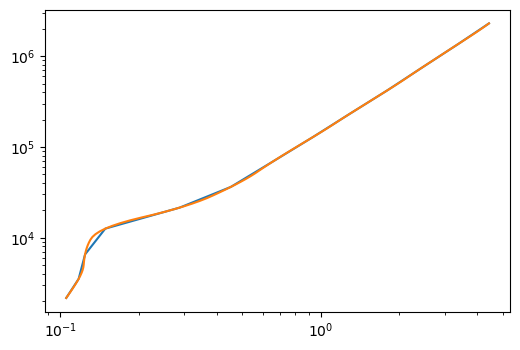

In [229]:
fkt = interpolate.interp1d(self.data.amp, self.data.d, kind = 'quadratic')

ampnew = np.logspace(np.log10(self.data.amp.min()), np.log10(self.data.amp.max()), 100)
dnew = fkt(ampnew)

plt.plot(self.data.d, self.data.amp)
plt.plot(dnew, ampnew)
plt.loglog()

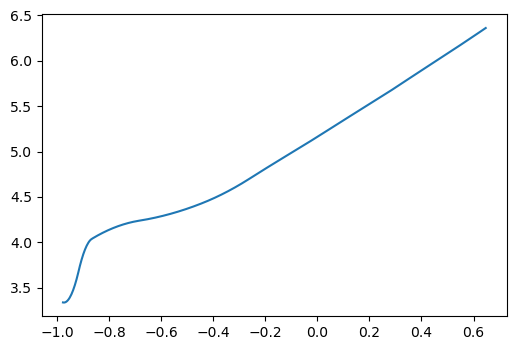

In [213]:
sf = UnivariateSpline(np.log10(self.data.d.values), np.log10(self.data.amp.values), 
                      s=0,
                      k = 2
                     )

d = np.linspace(np.log10(self.data.d.values.min()), np.log10(self.data.d.values.max()), 500)
amp = sf(d)

plt.plot(d,amp)
# plt.plot(np.log10(dfavg.d), np.log10(dfavg.amp))

In [ ]:
# us = UnivariateSpline(np.log10(self.data.amp), np.log10(self.data.d), s=0)
us = UnivariateSpline(amp, d, s=0)
cal_function = lambda amp: 10**us(np.log10(amp))

In [194]:
from scipy.interpolate import UnivariateSpline

In [ ]:
UnivariateSpline()

In [49]:
df.shape bide

(200, 2)

In [48]:
df.mie.mod(binedgs)

ValueError: Lengths must be equal

One can generate a calibration file based on the theoretical responds of the POPS instrument and a single point calibration.

In [22]:
cali, a = calibration.generate_calibration(single_pnt_cali_d = 510,
                                             single_pnt_cali_ior = 1.6,
                                             single_pnt_cali_int = 10**3.508,
                                             ior = 1.7,
                                             dr=np.array([110, 3400]),
                                             no_pts = 600,
                                             no_cal_pts = 29,
                                             plot = True,
                                             raise_error = True,
                                             test = False
                                            )

ValueError: x must be strictly increasing

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.lines.Line2D at 0x7fc998250ba8>)

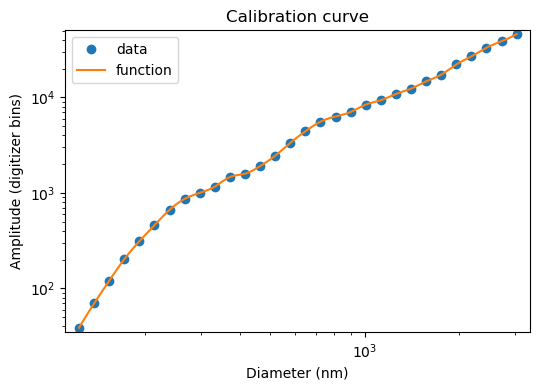

In [11]:
cali.plot_calibration()

# Generate a theoretical calibration

One can generate a calibration file based on the theoretical responds of the POPS instrument and a single point calibration.

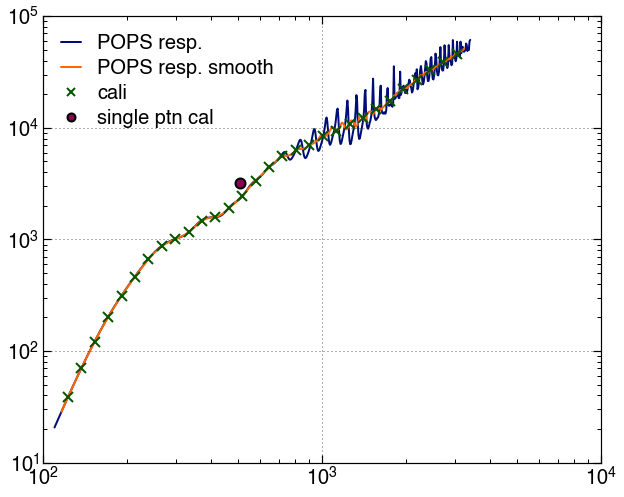

In [3]:
cali, a = calibration.generate_calibration(single_pnt_cali_d = 510,
                                             single_pnt_cali_ior = 1.6,
                                             single_pnt_cali_int = 10**3.508,
                                             ior = 1.5,
                                             dr=np.array([110, 3400]),
                                             no_pts = 600,
                                             no_cal_pts = 30,
                                             plot = True,
                                             raise_error = True,
                                             test = False
                                            )

(<matplotlib.figure.Figure at 0x10d7aea20>,
 <matplotlib.lines.Line2D at 0x10d893f98>)

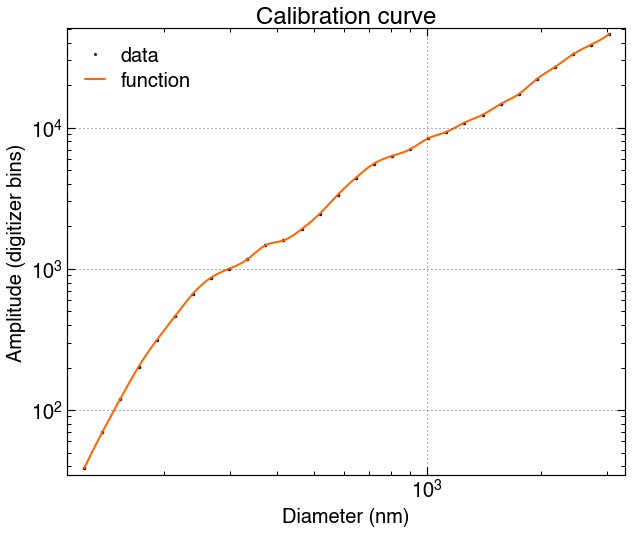

In [4]:
cali.plot_calibration()

# Generate an experimental calibration

This section shows how to read and save calibration data. In the process the data will be fit and a calibration function is created. Data and function can be plotted using the plot function mentioned below.

## read from string

create a string where each line consist of a diameter value (in nm) and an amplitude (in digitizer bin) seperated by space. <br> Note, in the example below the secend column is the $log_{10}(amplitude)$. The following cell does the convertion!

In [2]:
data = """130 1.73
140 1.85
150 1.99
173 2.28
200 2.53
233 2.77
270 2.96
315 3.04
365 3.165
420 3.213
490 3.355
570 3.56
660 3.72
770 3.795
890 3.86
1040 4.0
1200 4.05
1400 4.1
1600 4.18
1880 4.32
2180 4.44
2500 4.5"""

In [6]:
cal = calibration.read_str(data)

/Users/htelg/prog/atm-py/atmPy/instruments/POPS/calibration.py:140: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  dataFrame = pd.read_csv(sb, sep = ' ', names = ('d','amp')).sort('d')


## Save the calibration from above

In [7]:
fname = './data/POPS_calibration.csv'
cal.save_csv(fname)

## read the file we just saved

In [8]:
out = calibration.read_csv(fname)

# plot the created calibration function and data

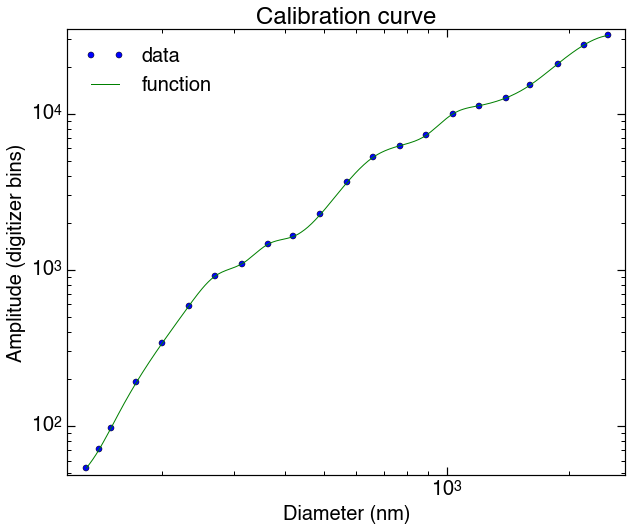

In [11]:
f,a,df,gf = cal.plot_calibration()

# Translate bins to diameters

This information is necessarey if data is provided prebinned e.g. when recorded through the serial interface.


bin edges (digitizer bins)
--------------------------
25.1188643151
40.9732109814
66.8343917569
109.018449239
177.827941004
290.068119869
473.151258961
771.791515585
1258.92541179
2053.52502646
3349.65439158
5463.86549882
8912.50938134
14537.8438561
23713.7370566
38681.2054633
63095.734448

bin centers (digitizer bins)
----------------------------
33.0460376482
53.9038013691
87.9264204977
143.423195121
233.948030437
381.609689415
622.471387273
1015.35846369
1656.22521913
2701.58970902
4406.7599452
7188.18744008
11725.1766187
19125.7904563
31197.47126
50888.4699557

bin centers of logarithms (digitizer bins)
----------------------------
32.0811553282
52.3299114681
85.3591339291
139.23550682
227.117186728
370.467402211
604.296390238
985.711900901
1607.86654905
2622.70835647
4278.09081988
6978.3058486
11382.8234525
18567.3532463
30286.5636114
49402.6220766


bin edges (nm)
--------------
-13123.6305447
46.6840431939
142.571641329
159.767885528
180.088512944
203.671751733
231.442555915
27

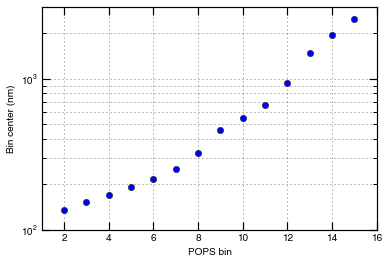

In [17]:
out = calibration.get_interface_bins('/Users/htelg/data/POPS_calibrations/150529_MS1_DOS.csv', 16)